In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sci
from sklearn.linear_model import LinearRegression
from os import listdir
import pandas as pd
import os
import glob

In [2]:
# rename dat files and save in /n and /s
n_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_n' in i]
s_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_s' in i]
name = [f'dla_mode_n_ts_{10**(int(i/26))}_nb_10000_seed_{i}_.dat' for i in range(5,105,5)]
name_ = [f'dla_n_mode_{10**(int(i/26))}_{int(i/5%5)}.dat' for i in range(5,105,5)]

os.rename('./files/'+name[-1],'./files/n/'+name_[-1])

['dla_mode_n_ts_1_nb_10000_seed_5_.dat', 'dla_mode_n_ts_1_nb_10000_seed_10_.dat', 'dla_mode_n_ts_1_nb_10000_seed_15_.dat', 'dla_mode_n_ts_1_nb_10000_seed_20_.dat', 'dla_mode_n_ts_1_nb_10000_seed_25_.dat', 'dla_mode_n_ts_10_nb_10000_seed_30_.dat', 'dla_mode_n_ts_10_nb_10000_seed_35_.dat', 'dla_mode_n_ts_10_nb_10000_seed_40_.dat', 'dla_mode_n_ts_10_nb_10000_seed_45_.dat', 'dla_mode_n_ts_10_nb_10000_seed_50_.dat', 'dla_mode_n_ts_100_nb_10000_seed_55_.dat', 'dla_mode_n_ts_100_nb_10000_seed_60_.dat', 'dla_mode_n_ts_100_nb_10000_seed_65_.dat', 'dla_mode_n_ts_100_nb_10000_seed_70_.dat', 'dla_mode_n_ts_100_nb_10000_seed_75_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_80_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_85_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_90_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_95_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_100_.dat']
['dla_n_mode_1_1.dat', 'dla_n_mode_1_2.dat', 'dla_n_mode_1_3.dat', 'dla_n_mode_1_4.dat', 'dla_n_mode_1_0.dat', 'dla_n_mode_10_1.dat', 'dla_n_mode_10_

FileNotFoundError: [Errno 2] No such file or directory: './files/dla_mode_n_ts_1000_nb_10000_seed_100_.dat' -> './files/n/dla_n_mode_1000_0.dat'

In [14]:
## save files in /particles
def extend_fibers(fname):    
    print('extending ', fname)
    fout = fname.replace('dla_','')
    #fout = fname.replace('/files','./files/particles')
    with open ('./files/particles/%s'%fout, "w") as fid:
        with open('./files/%s'%fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        #print('ok')
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

def mass_center(fname):
    y, yt2, counts1 = [], [], []

    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y.append(int(row[3]))
    yc, counts = np.unique(y, return_counts=True)    
    #print(yc)
    #print(counts)
    fiber_length = np.max(yc) - np.min(yc)
    # y of mass center
    yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)
    #print(yc0)
    #print(yc0[0][0])
    for i in range(len(yc0)):
        yt2.append(yc0[i][0])
        counts1.append(yc0[i][1])

    print('length: %d' %fiber_length)

    return yc0, yt2, counts1, yc0[0][0], fiber_length

def transversal_section(fname, yc0, yc, arquivo):
   
    x, z = [], []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y = int(row[3])
            
            if y == yc0:
                #print('entrou')
                #print(int(row[2]))
                x.append(int(row[2]))
                z.append(int(row[4]))

    xc, zc = np.mean(x), np.mean(z)
    #print(x)
    #print(z)
    #x = np.array(x)
    #z = np.array(z)
    #print(x)
    #print(z)
    x2 = np.power(x-xc,2)
    z2 = np.power(z-zc,2)
    radius = np.max(np.sqrt(x2+z2))
    #radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
    #radius = np.max(radius)
    #print(radius)
    #plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
    #plt.show()
    occup = float(len(x))
    A = float(np.pi*(radius**2))
    densitty = float(occup/A * 100)
    print("massa: %f" % occup)
    print("Area: %f" %A)
    print("Densidade %.2f" % densitty)

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xc+radius*np.cos(theta)
    y_ = zc+radius*np.sin(theta)

    plt.figure(figsize=(8,8))
    #plt.grid()
    plt.plot([xc],[zc],'s',color='darkorange',zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados') # Dados
    #plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    plt.axis('off')
    plt.xlim(-35,35)
    plt.ylim(-35,35)
    plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    
    return x, z, xc, zc, radius, densitty

def fractal(Radius,x,z,xcent,zcent,contador,arquivo):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,Radius,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #radius = 0
    #occup = float(len(x))
    #A = float(np.pi*(Radius**2))
    #densitty = float(occup/A * 100)
    #print("massa: %f" % occup)
    #print("Area: %f" %A)
    #print("Densidade %.2f" % densitty)
    #print(radius)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont/(contador + 1)).reshape(-1,1)
    j, R = 0, 0
    #print(radius)
    #print(cont)
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2 > R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize = (8,8))
    plt.plot(radius, cont, 'o--',color='darkslategray')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[18:-4]+"_fractal" + '.jpg', dpi=400)
    #plt.show()


    return reg.coef_[0][0]

def mass_per_length(yt,counts,max, num, arquivo):
    plt.figure(figsize = (8,8))
    yleft = []
    yright = []
    xleft = []
    xright = []
    #print(yt)

    idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


    for j in idx:

        #print(type(int(j)))
        plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], 'ro', zorder = 1)
        #print(yt[j] - min(yt))
        #print(counts[j])

        if yt[j] > max:
            yright.append(counts[j])
            xright.append(yt[j] - np.min(yt))

        else:
            yleft.append(counts[j])
            xleft.append(yt[j] - np.min(yt))
        

    #plt.xlim(0,2200)
    #plt.ylim(0,210)

    ## Lado esquerdo 
    yleft=np.array(yleft)
    xleft=np.array(xleft)
    xleft = xleft.reshape(-1,1)
    yleft = yleft.reshape(-1,1)


    ## Lado direito
    yright=np.array(yright)
    xright=np.array(xright)
    xright = xright.reshape(-1,1)
    yright = yright.reshape(-1,1)


    reg = LinearRegression().fit(xleft, yleft)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
    Y = Y[0]
    plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y, 'b-', zorder = 5)

    reg = LinearRegression().fit(xright, yright)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
    Yy = Yy[0]
    plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy, 'b-', zorder = 5)
    plt.xlabel('Distance from tip (lattices units)')
    plt.ylabel('Mass (occupied lattices units)')
    plt.savefig("./img/"+arquivo[18:-4]+"_tips" + '.jpg', dpi=400)
    plt.show()

In [4]:
### EXTEND FIBERS

#wdir = './files/particles'
#print(os.listdir('./files/'))
#for fname in os.listdir(wdir):
#extend_fibers(os.path.join(wdir, fname))
files = ['mode_n_ts_1_nb_10000_seed_', 'mode_n_ts_10_nb_10000_seed_', 'mode_n_ts_100_nb_10000_seed_', 'mode_n_ts_1000_nb_10000_seed_', 'mode_n_ts_10000_nb_10000_seed_',
'mode_s_ts_1_nb_10000_seed_', 'mode_s_ts_10_nb_10000_seed_', 'mode_s_ts_100_nb_10000_seed_', 'mode_s_ts_1000_nb_10000_seed_', 'mode_s_ts_10000_nb_10000_seed_', ]
#print(files[0])
for j in files[:]:
    for i in os.listdir('./files/'):
        i.split()
        #print(i[3:-7])
        if i[4:-7] == j:
            print(i)
            extend_fibers(i)


dla_mode_n_ts_1_nb_10000_seed_12_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_12_.dat
dla_mode_n_ts_1_nb_10000_seed_13_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_13_.dat
dla_mode_n_ts_1_nb_10000_seed_11_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_11_.dat
dla_mode_n_ts_1_nb_10000_seed_10_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_10_.dat
dla_mode_n_ts_1_nb_10000_seed_14_.dat
extending  dla_mode_n_ts_1_nb_10000_seed_14_.dat
dla_mode_n_ts_10_nb_10000_seed_18_.dat
extending  dla_mode_n_ts_10_nb_10000_seed_18_.dat
dla_mode_n_ts_10_nb_10000_seed_15_.dat
extending  dla_mode_n_ts_10_nb_10000_seed_15_.dat
dla_mode_n_ts_10_nb_10000_seed_16_.dat
extending  dla_mode_n_ts_10_nb_10000_seed_16_.dat
dla_mode_n_ts_10_nb_10000_seed_19_.dat
extending  dla_mode_n_ts_10_nb_10000_seed_19_.dat
dla_mode_n_ts_10_nb_10000_seed_17_.dat
extending  dla_mode_n_ts_10_nb_10000_seed_17_.dat
dla_mode_n_ts_100_nb_10000_seed_20_.dat
extending  dla_mode_n_ts_100_nb_10000_seed_20_.dat
dla_mode_n_ts_100_nb_10000_se

./files/particles/mode_n_ts_1_nb_10000_seed_14_.dat
length: 2582
massa: 160.000000
Area: 1891.533915
Densidade 8.46


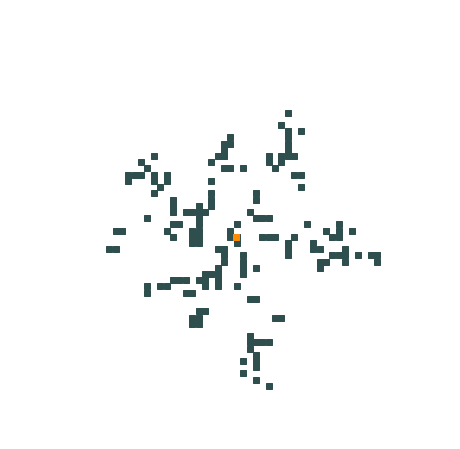

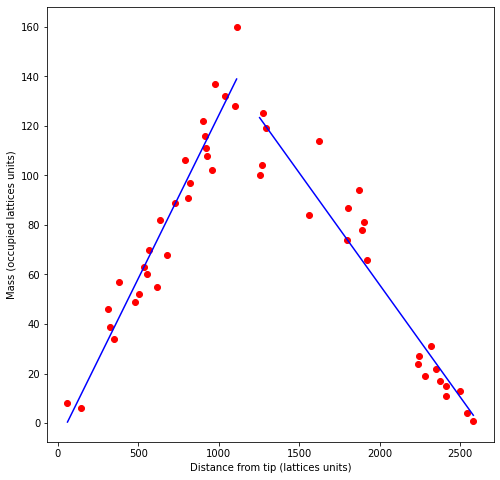

./files/particles/mode_n_ts_1_nb_10000_seed_11_.dat
length: 2712
massa: 153.000000
Area: 1799.070362
Densidade 8.50


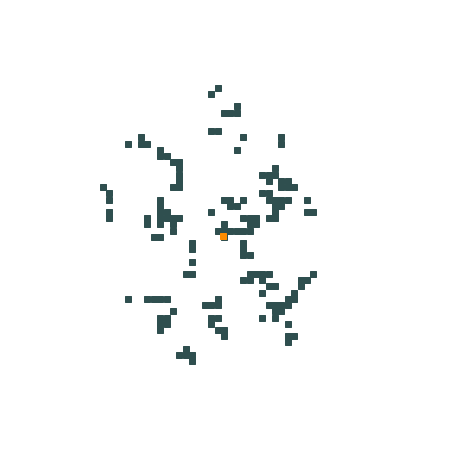

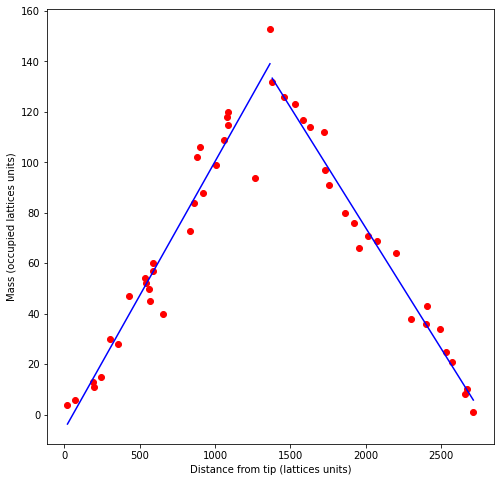

./files/particles/mode_n_ts_1_nb_10000_seed_10_.dat
length: 2477
massa: 173.000000
Area: 2615.850813
Densidade 6.61


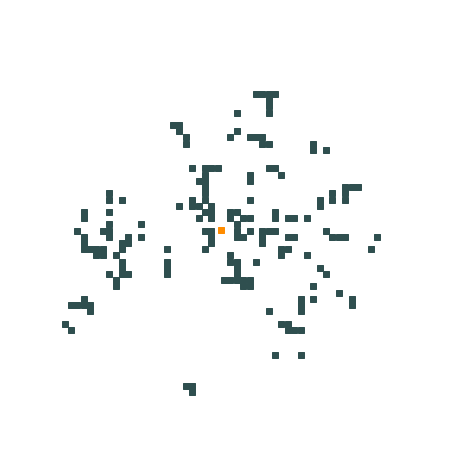

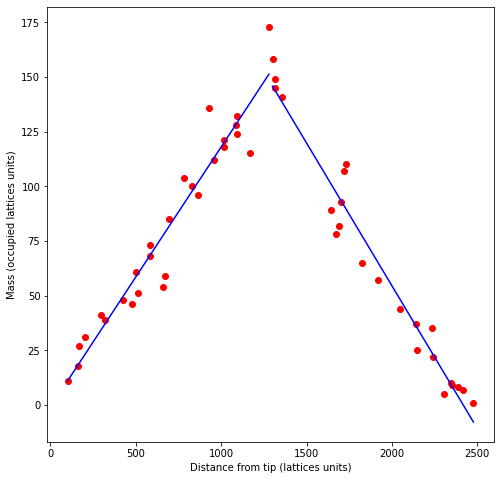

./files/particles/mode_n_ts_1_nb_10000_seed_12_.dat
length: 2535
massa: 153.000000
Area: 2547.365416
Densidade 6.01


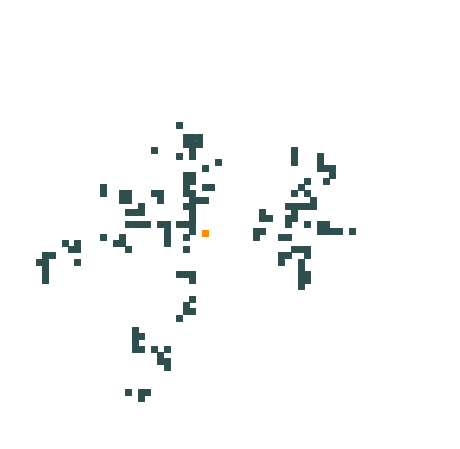

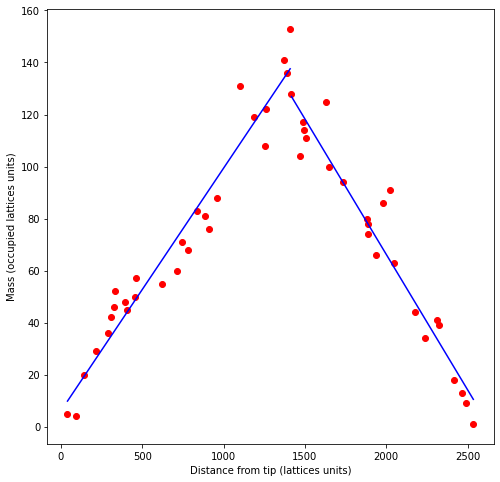

./files/particles/mode_n_ts_1_nb_10000_seed_13_.dat
length: 2530
massa: 175.000000
Area: 2373.893582
Densidade 7.37


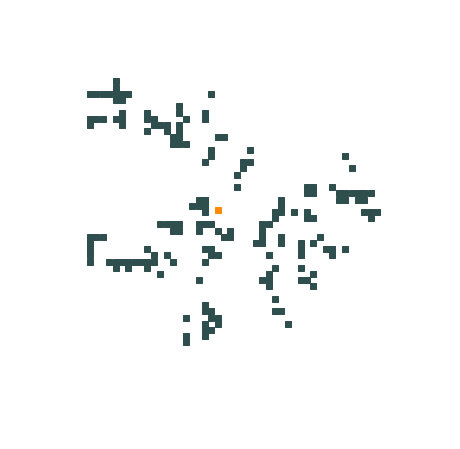

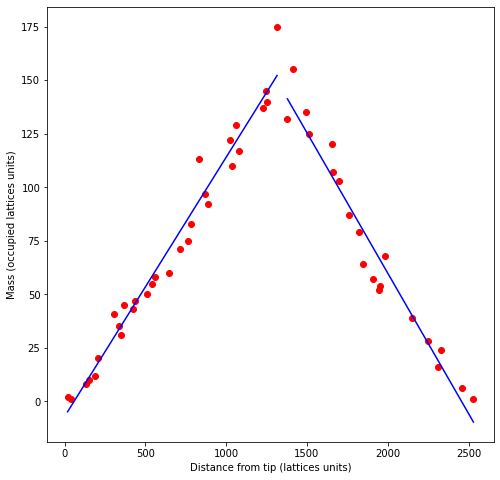

./files/particles/mode_n_ts_10_nb_10000_seed_19_.dat
length: 2448
massa: 174.000000
Area: 1574.374252
Densidade 11.05


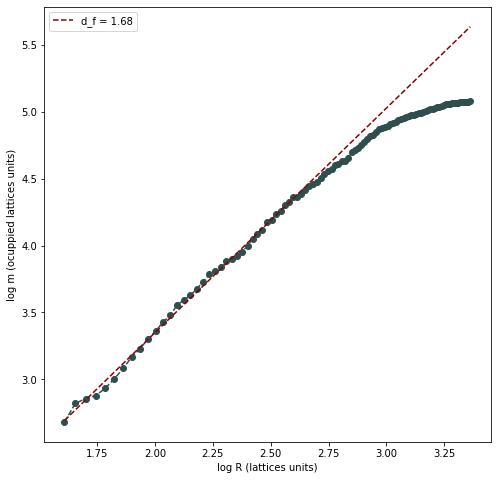

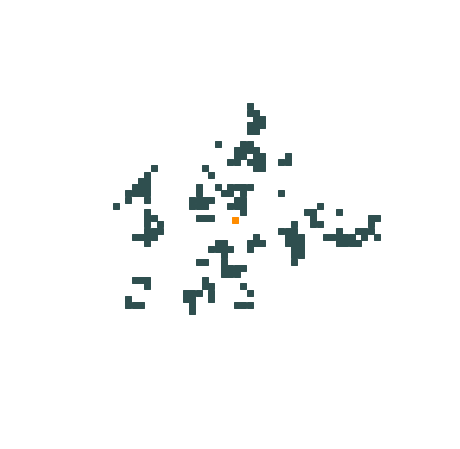

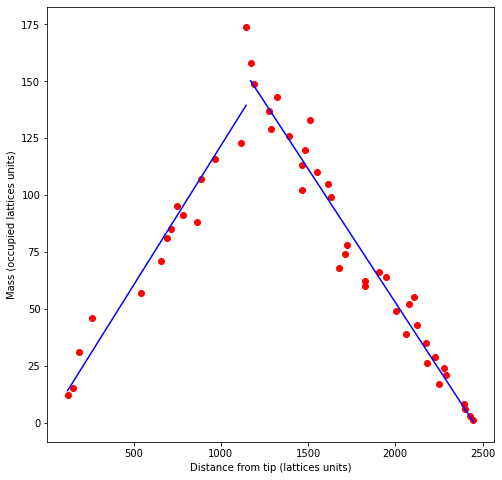

./files/particles/mode_n_ts_10_nb_10000_seed_17_.dat
length: 2469
massa: 183.000000
Area: 1323.639787
Densidade 13.83


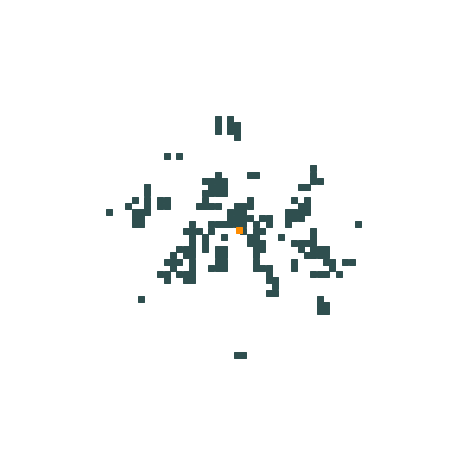

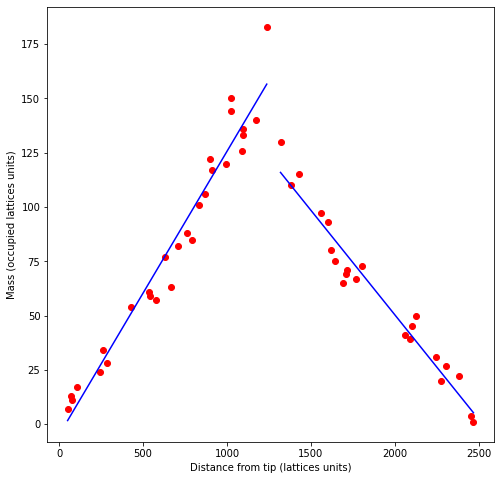

./files/particles/mode_n_ts_10_nb_10000_seed_16_.dat
length: 2548
massa: 151.000000
Area: 1161.145927
Densidade 13.00


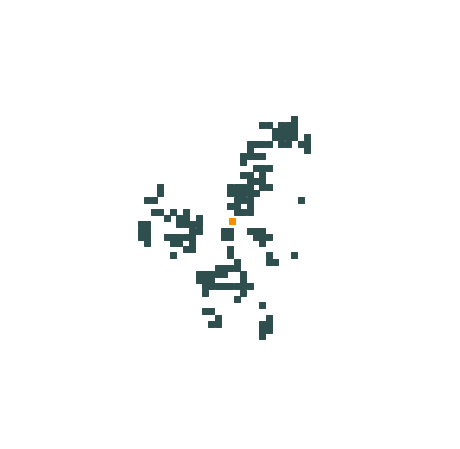

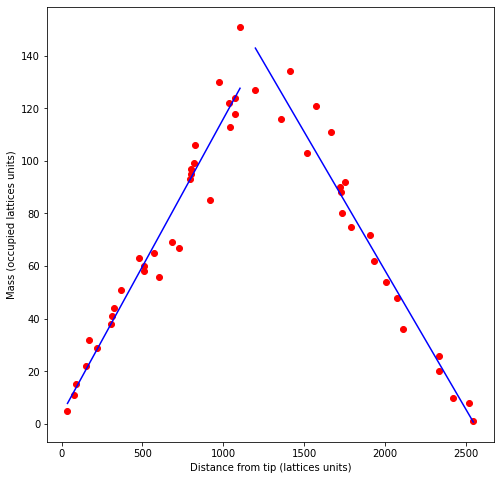

./files/particles/mode_n_ts_10_nb_10000_seed_18_.dat
length: 2540
massa: 169.000000
Area: 1691.488659
Densidade 9.99


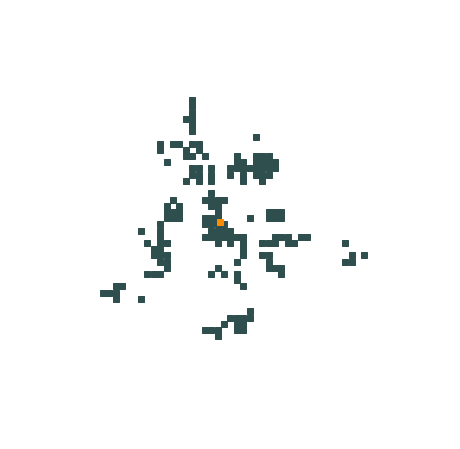

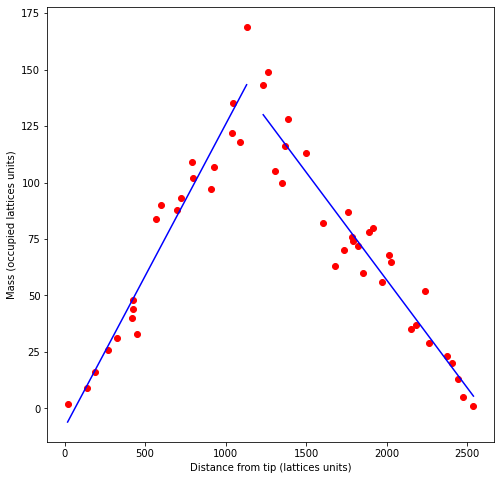

./files/particles/mode_n_ts_10_nb_10000_seed_15_.dat
length: 2628
massa: 157.000000
Area: 1686.220574
Densidade 9.31


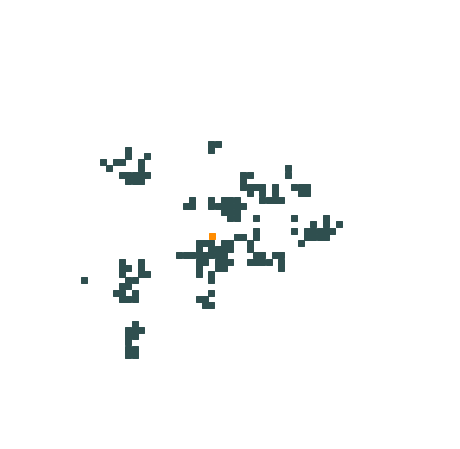

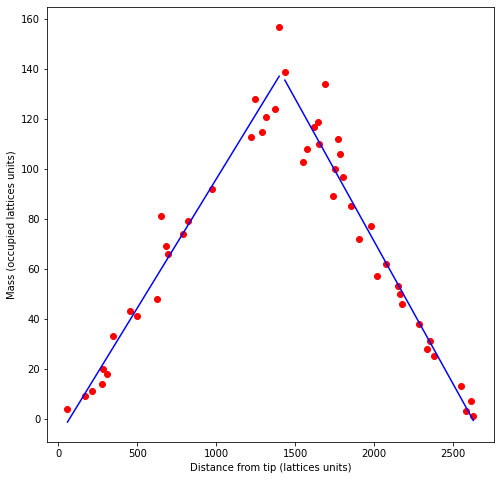

./files/particles/mode_n_ts_100_nb_10000_seed_22_.dat
length: 2651
massa: 158.000000
Area: 392.917674
Densidade 40.21


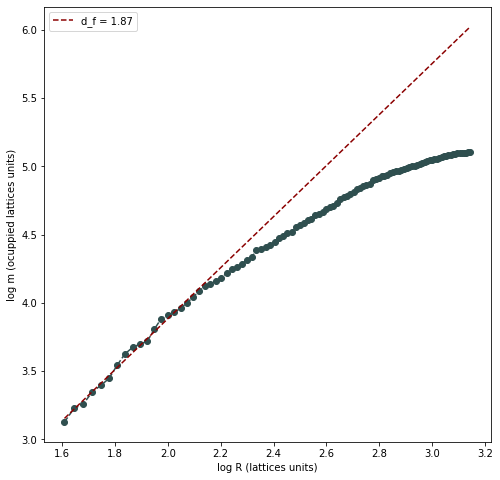

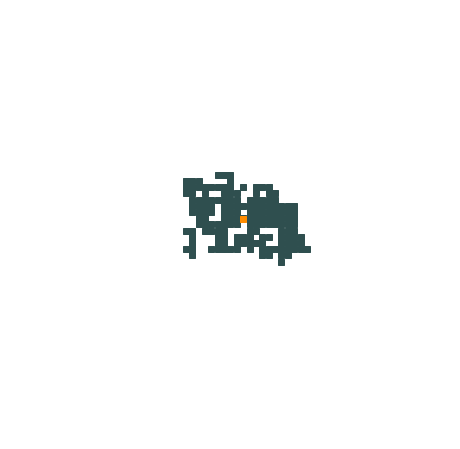

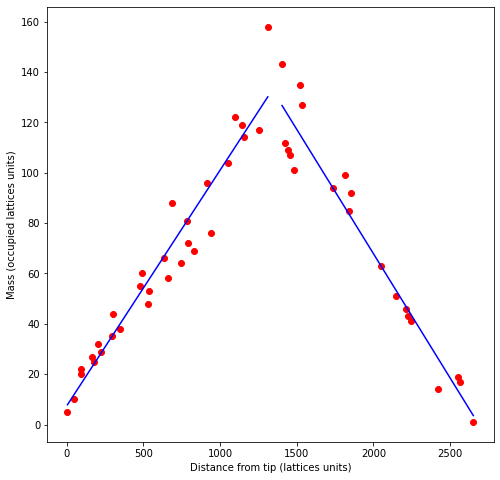

./files/particles/mode_n_ts_100_nb_10000_seed_24_.dat
length: 2792
massa: 157.000000
Area: 396.014520
Densidade 39.65


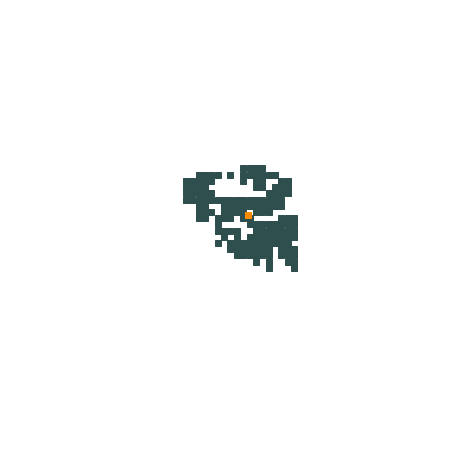

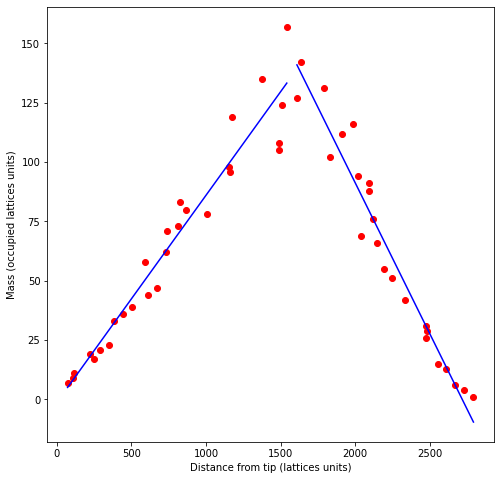

./files/particles/mode_n_ts_100_nb_10000_seed_21_.dat
length: 2717
massa: 157.000000
Area: 794.989650
Densidade 19.75


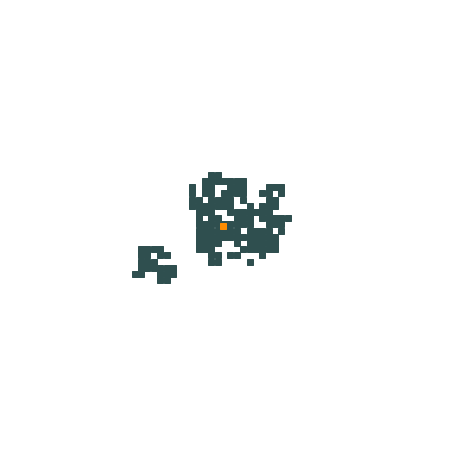

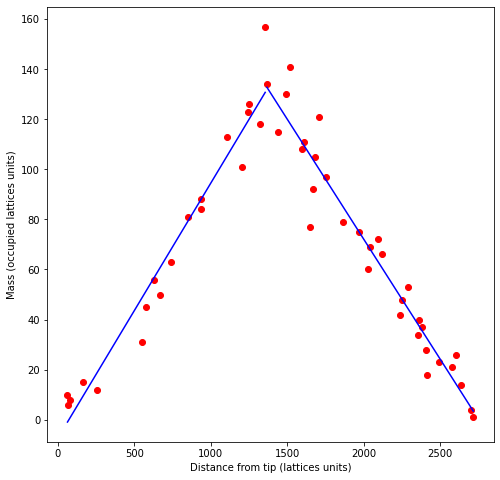

./files/particles/mode_n_ts_100_nb_10000_seed_20_.dat
length: 2748
massa: 146.000000
Area: 294.410385
Densidade 49.59


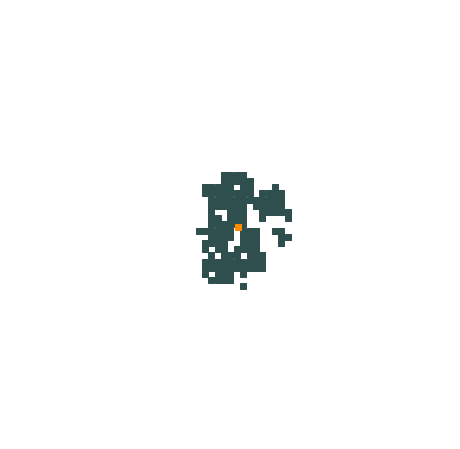

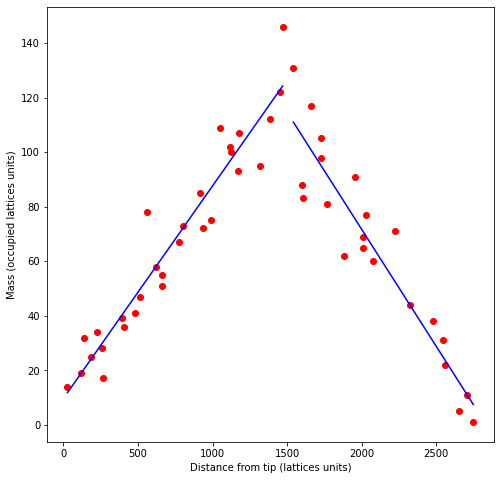

./files/particles/mode_n_ts_100_nb_10000_seed_23_.dat
length: 2654
massa: 157.000000
Area: 320.102278
Densidade 49.05


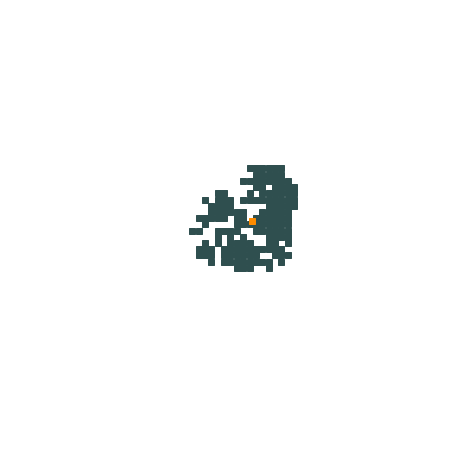

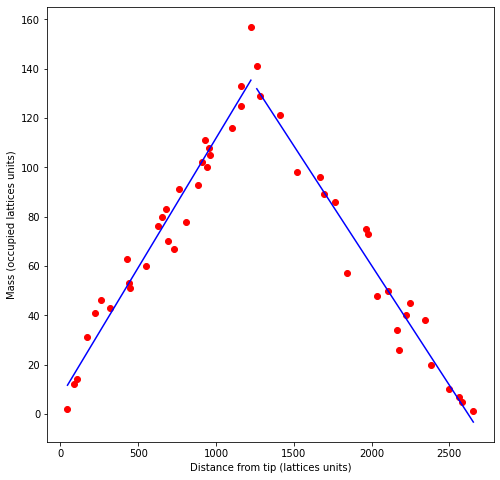

./files/particles/mode_n_ts_1000_nb_10000_seed_27_.dat
length: 2970
massa: 160.000000
Area: 316.119079
Densidade 50.61


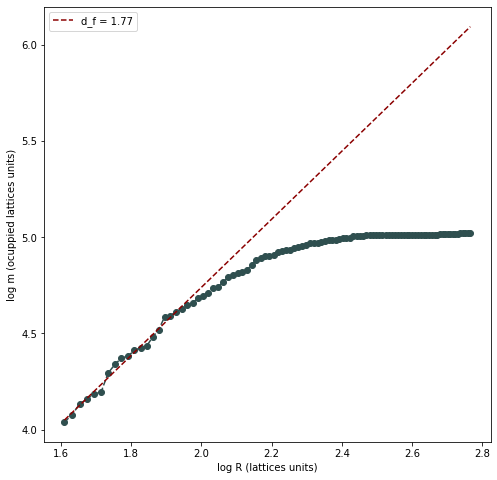

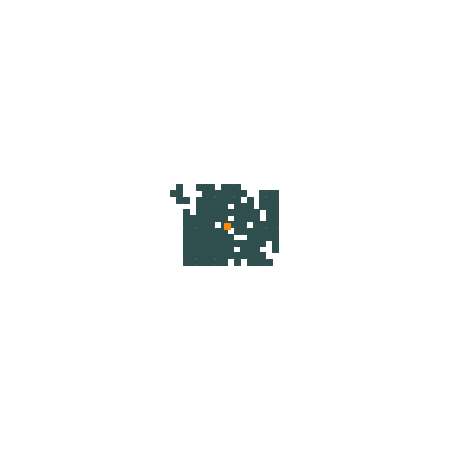

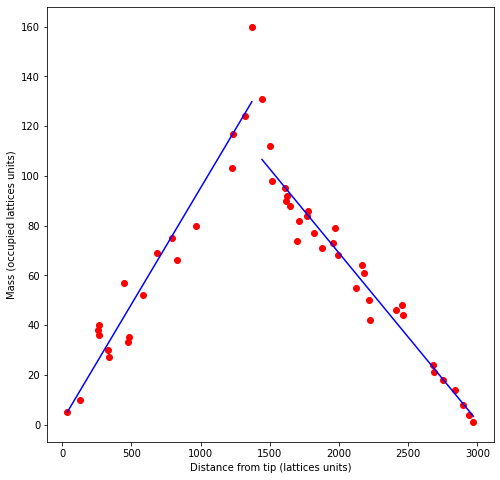

./files/particles/mode_n_ts_1000_nb_10000_seed_25_.dat
length: 2672
massa: 157.000000
Area: 292.825265
Densidade 53.62


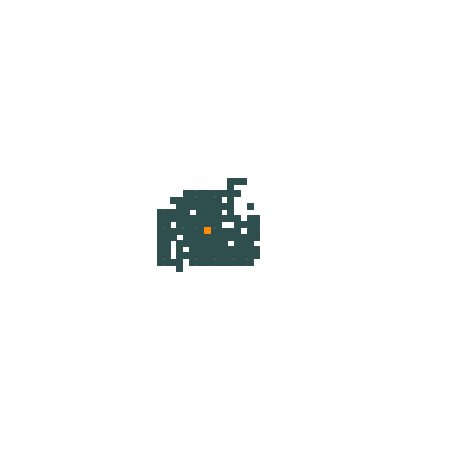

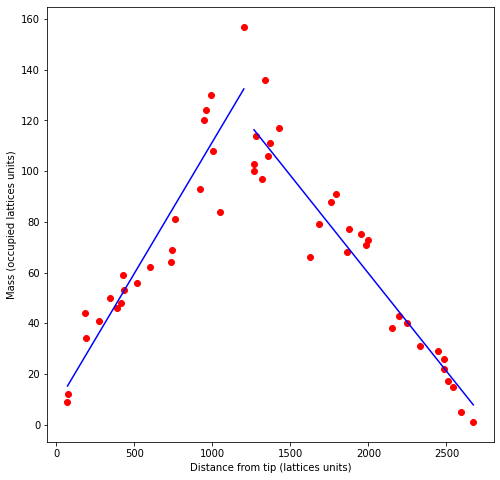

./files/particles/mode_n_ts_1000_nb_10000_seed_26_.dat
length: 2806
massa: 148.000000
Area: 290.038821
Densidade 51.03


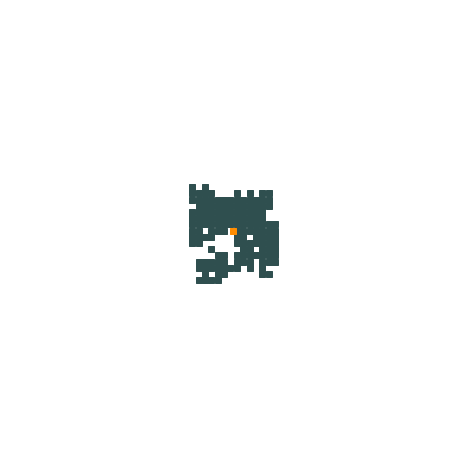

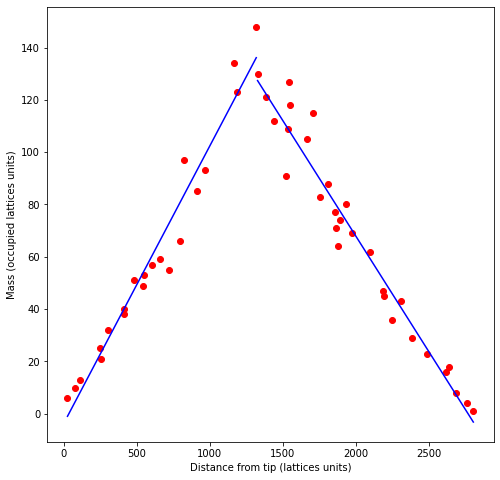

./files/particles/mode_n_ts_1000_nb_10000_seed_29_.dat
length: 2620
massa: 176.000000
Area: 320.304215
Densidade 54.95


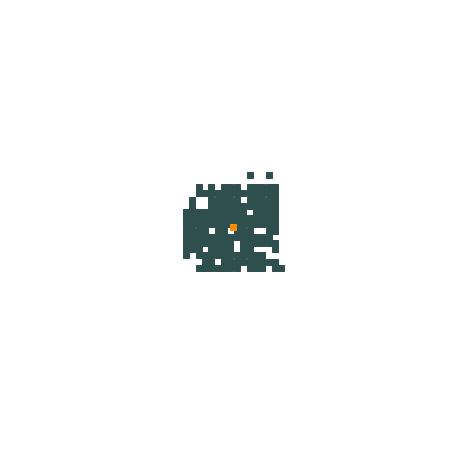

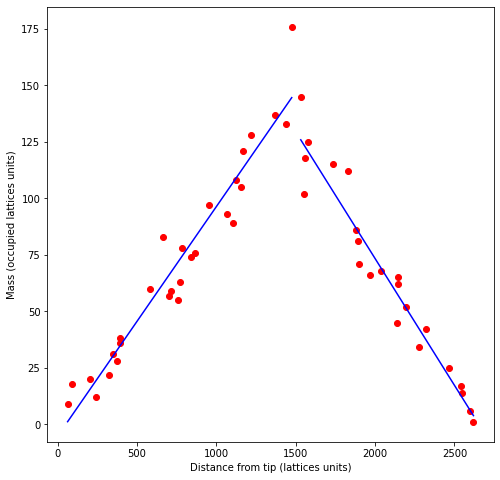

./files/particles/mode_n_ts_1000_nb_10000_seed_28_.dat
length: 2662
massa: 156.000000
Area: 265.536096
Densidade 58.75


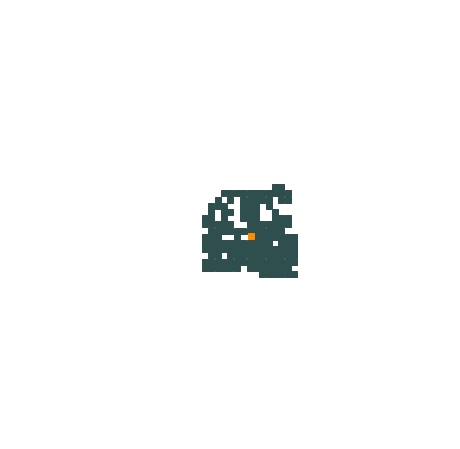

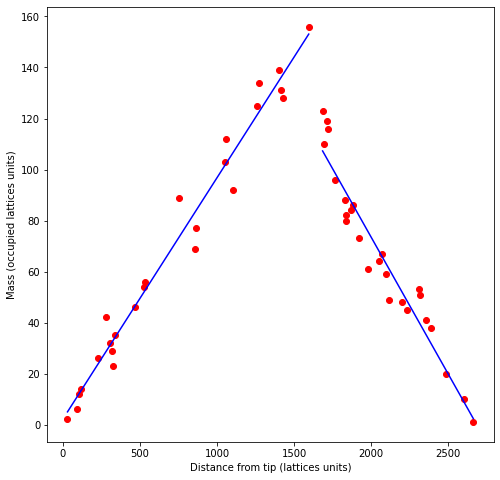

./files/particles/mode_n_ts_10000_nb_10000_seed_53_.dat
length: 625
massa: 39.000000
Area: 54.003998
Densidade 72.22


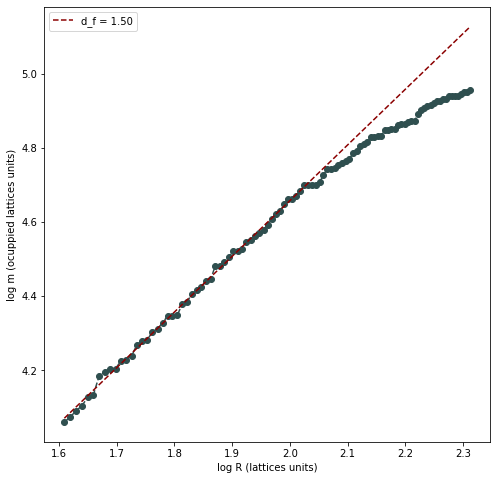

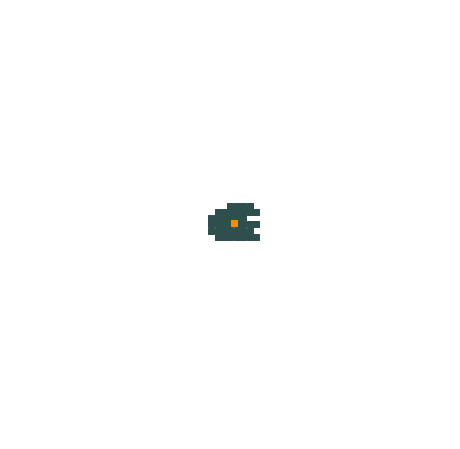

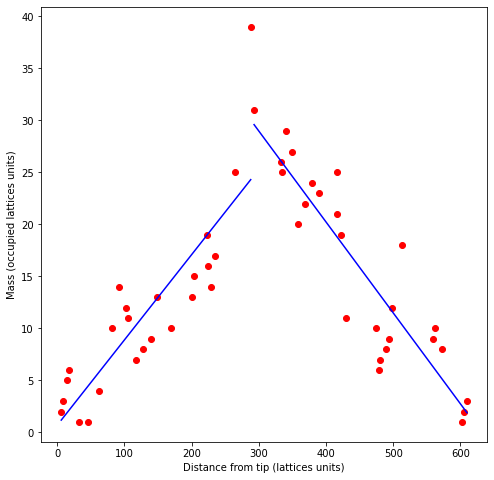

./files/particles/mode_n_ts_10000_nb_10000_seed_56_.dat
length: 2540
massa: 161.000000
Area: 267.460056
Densidade 60.20


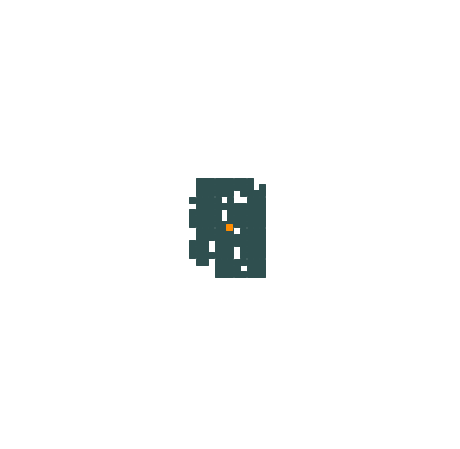

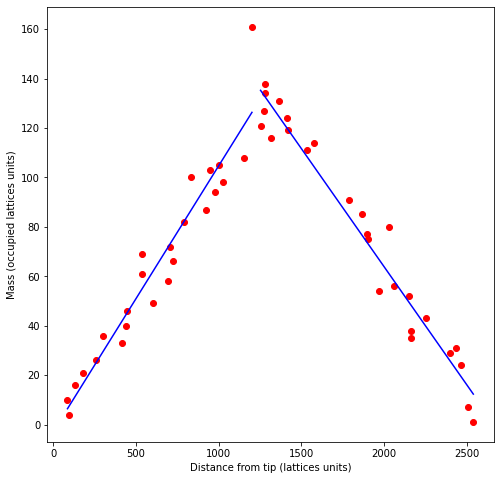

./files/particles/mode_n_ts_10000_nb_10000_seed_52_.dat
length: 2903
massa: 152.000000
Area: 261.203767
Densidade 58.19


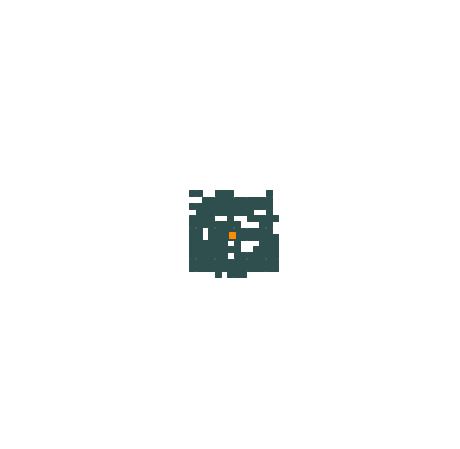

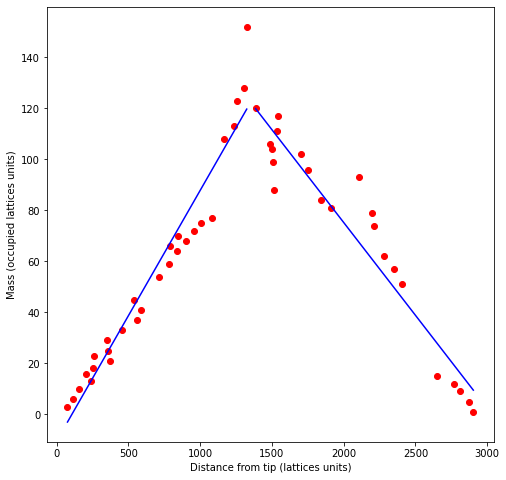

./files/particles/mode_n_ts_10000_nb_10000_seed_58_.dat
length: 2908
massa: 158.000000
Area: 261.256577
Densidade 60.48


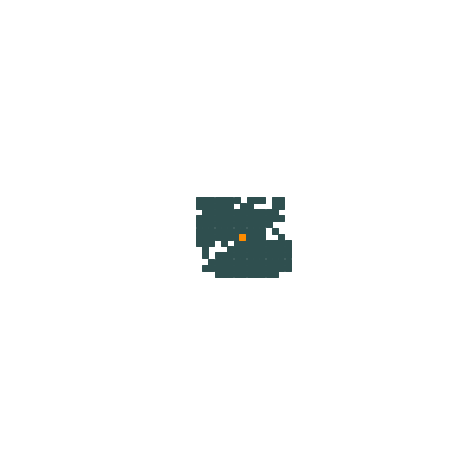

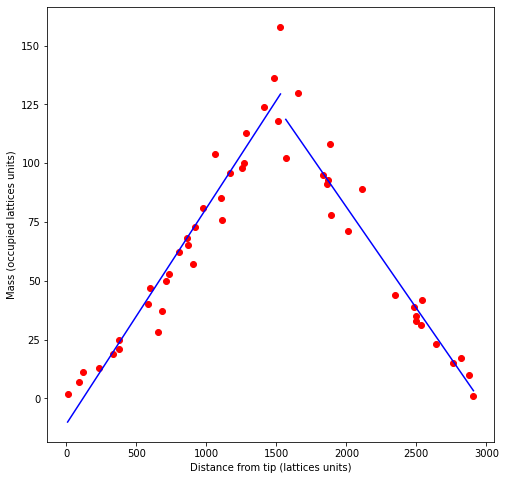

./files/particles/mode_n_ts_10000_nb_10000_seed_62_.dat
length: 2784
massa: 143.000000
Area: 275.208525
Densidade 51.96


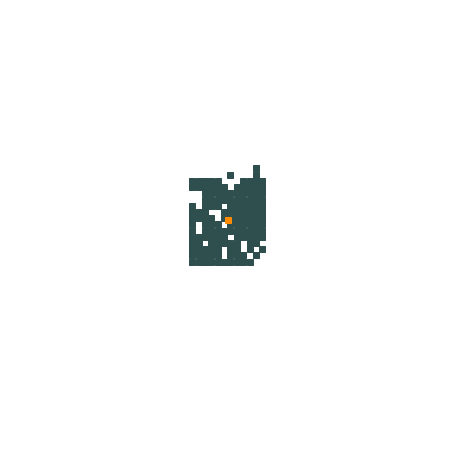

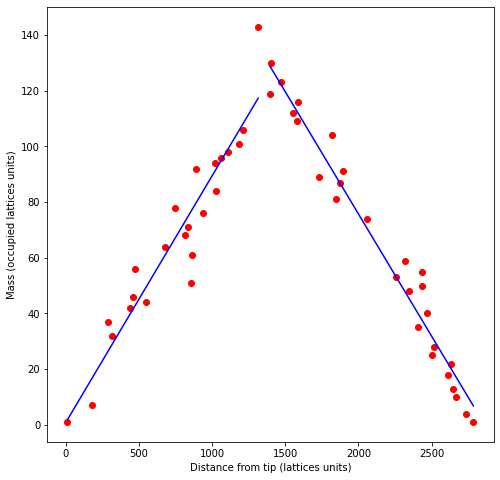

./files/particles/mode_s_ts_1_nb_10000_seed_32_.dat
length: 2013
massa: 224.000000
Area: 1745.497830
Densidade 12.83


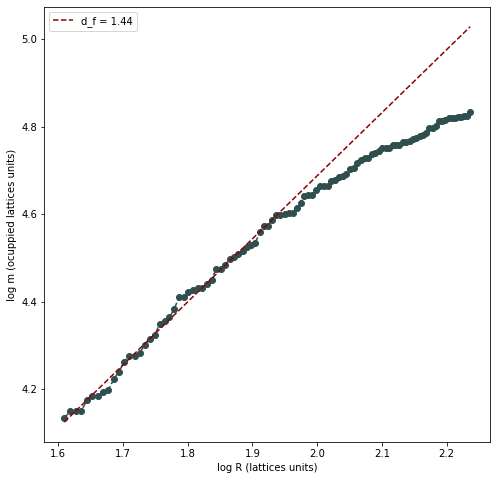

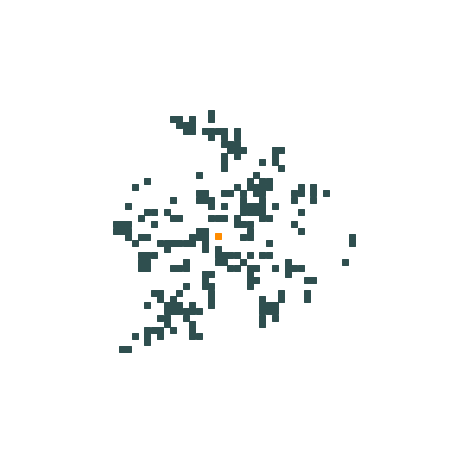

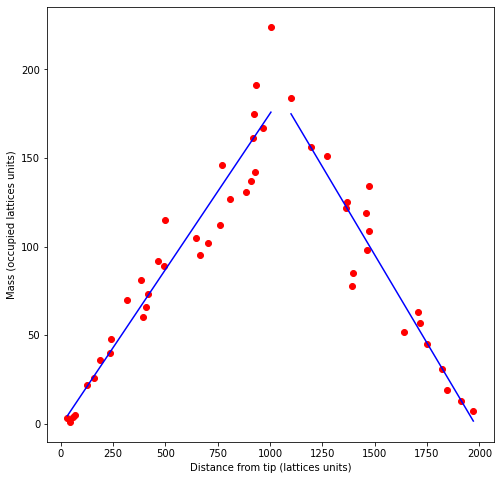

./files/particles/mode_s_ts_1_nb_10000_seed_34_.dat
length: 2005
massa: 210.000000
Area: 2115.633836
Densidade 9.93


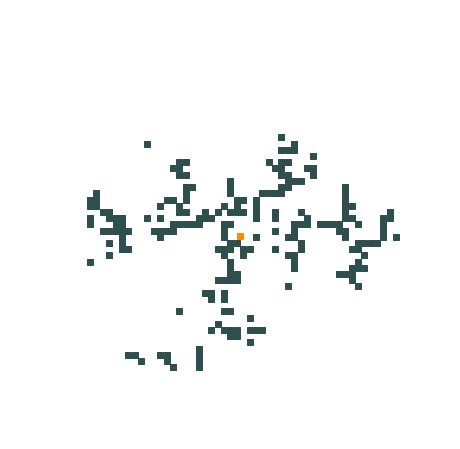

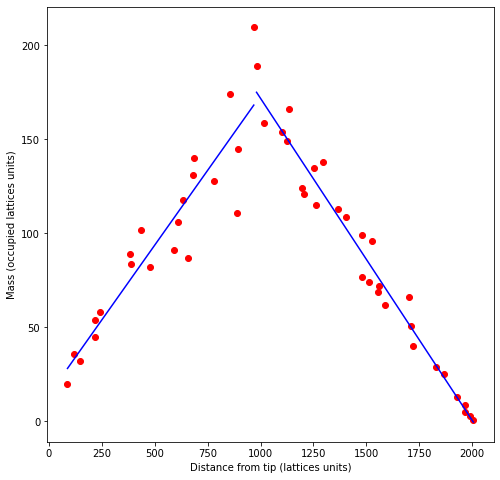

./files/particles/mode_s_ts_1_nb_10000_seed_33_.dat
length: 2221
massa: 214.000000
Area: 1627.068949
Densidade 13.15


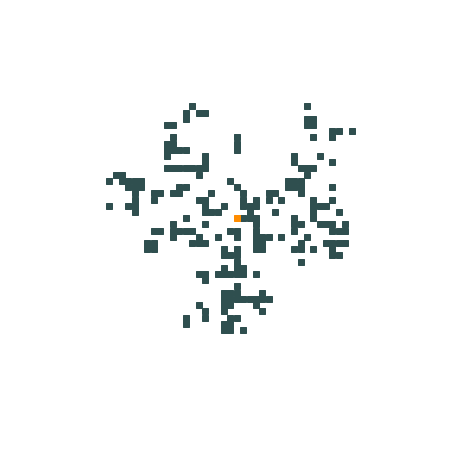

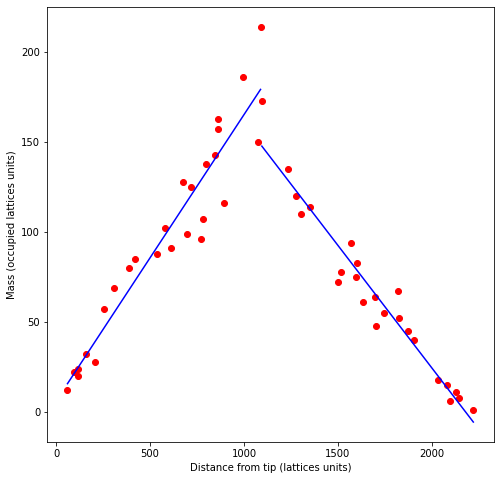

./files/particles/mode_s_ts_1_nb_10000_seed_31_.dat
length: 2057
massa: 204.000000
Area: 1962.648259
Densidade 10.39


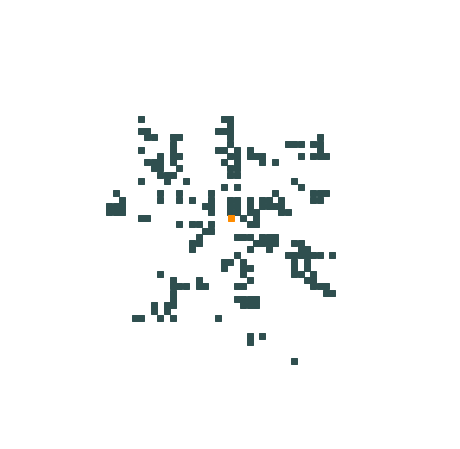

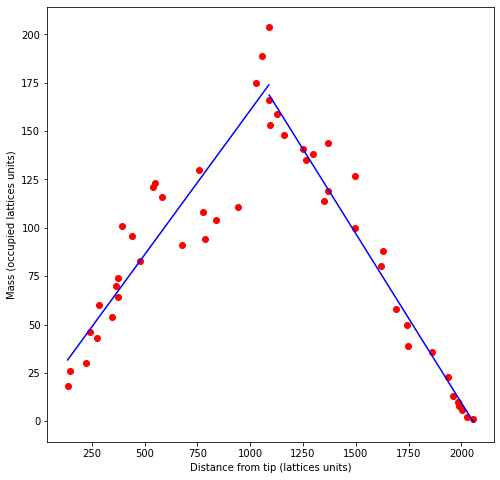

./files/particles/mode_s_ts_1_nb_10000_seed_30_.dat
length: 2001
massa: 223.000000
Area: 1755.853248
Densidade 12.70


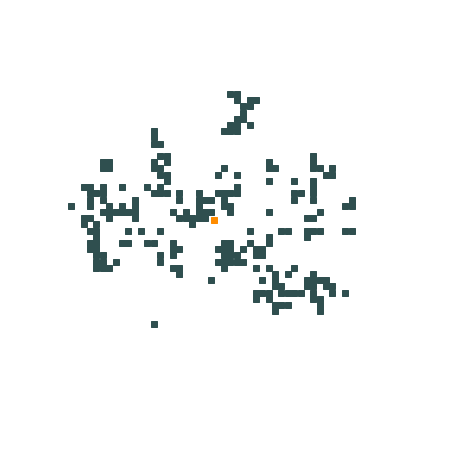

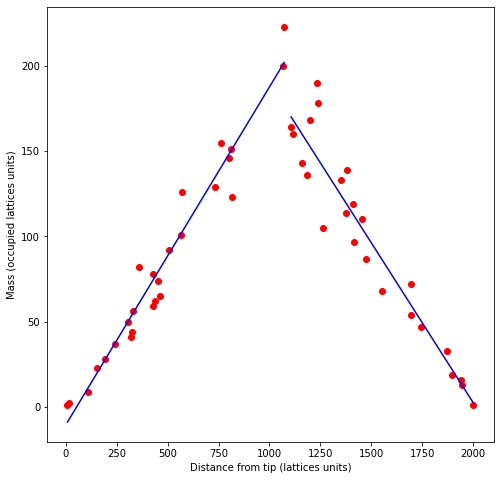

./files/particles/mode_s_ts_10_nb_10000_seed_38_.dat
length: 2161
massa: 208.000000
Area: 1200.114317
Densidade 17.33


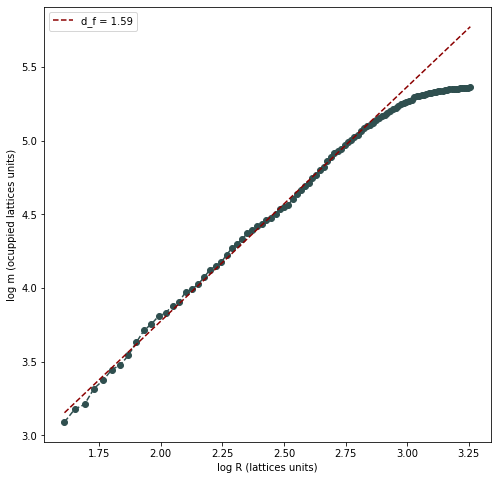

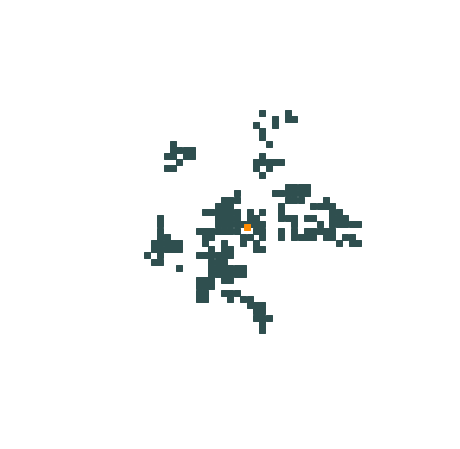

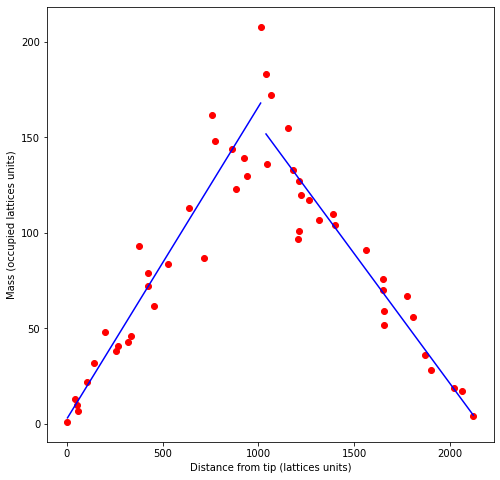

./files/particles/mode_s_ts_10_nb_10000_seed_37_.dat
length: 2161
massa: 197.000000
Area: 1450.680455
Densidade 13.58


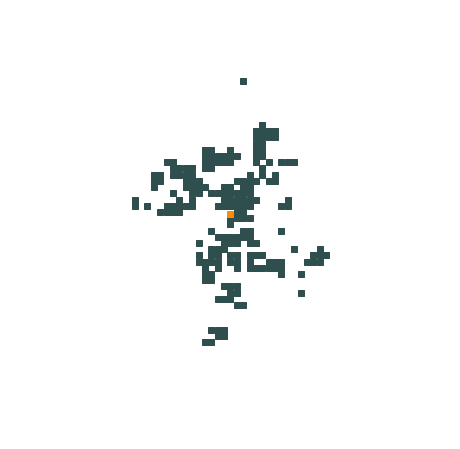

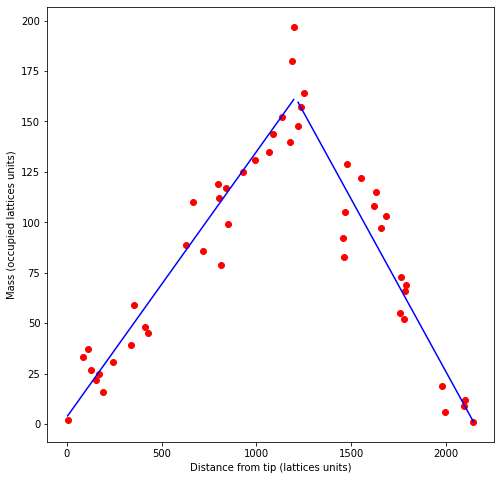

./files/particles/mode_s_ts_10_nb_10000_seed_36_.dat
length: 2209
massa: 224.000000
Area: 1269.757669
Densidade 17.64


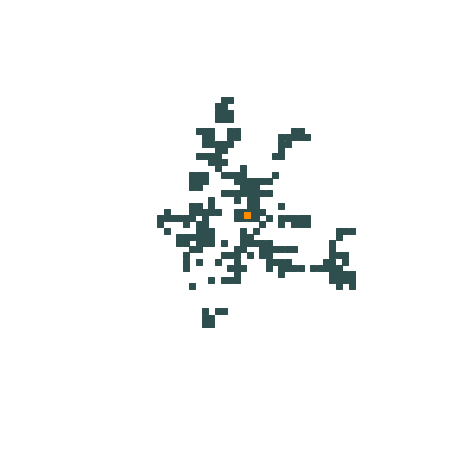

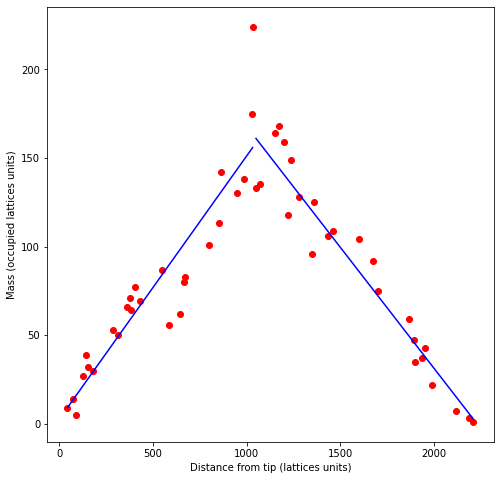

./files/particles/mode_s_ts_10_nb_10000_seed_39_.dat
length: 2153
massa: 201.000000
Area: 949.737339
Densidade 21.16


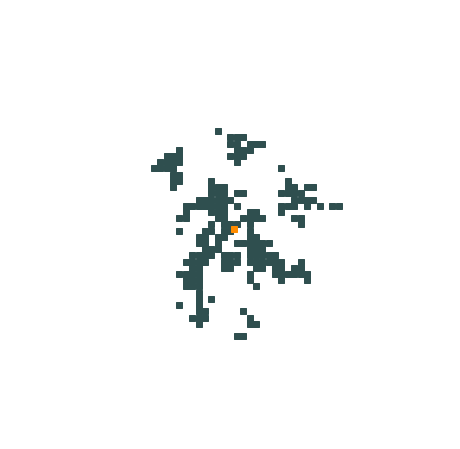

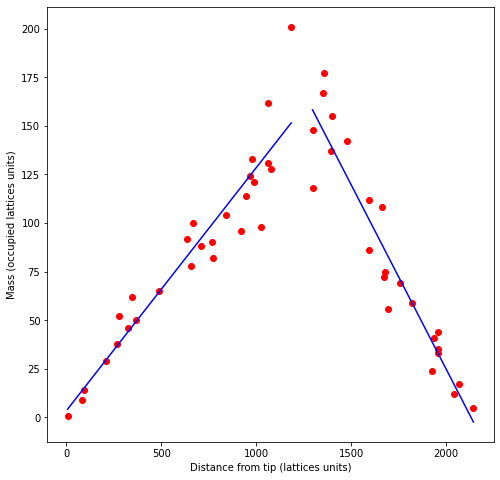

./files/particles/mode_s_ts_10_nb_10000_seed_35_.dat
length: 2141
massa: 211.000000
Area: 1031.320351
Densidade 20.46


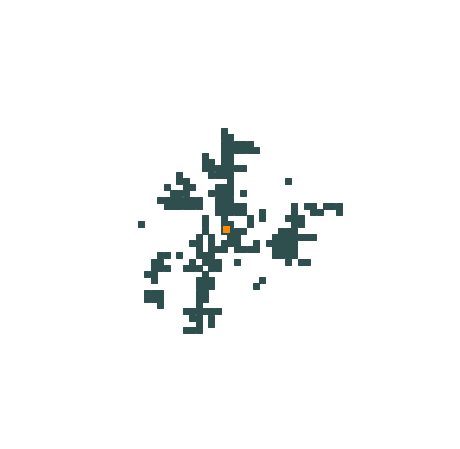

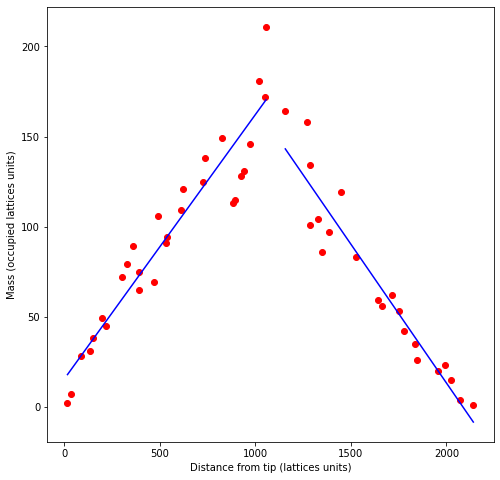

./files/particles/mode_s_ts_100_nb_10000_seed_41_.dat
length: 2089
massa: 207.000000
Area: 638.813601
Densidade 32.40


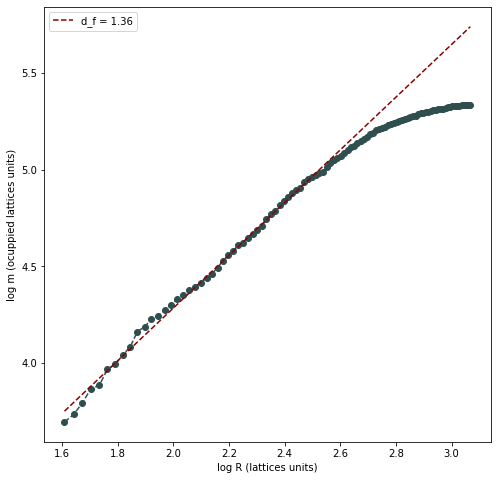

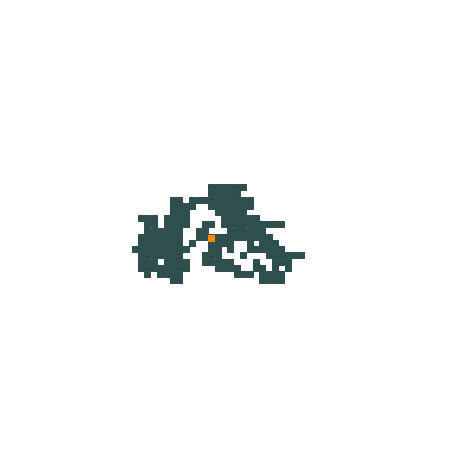

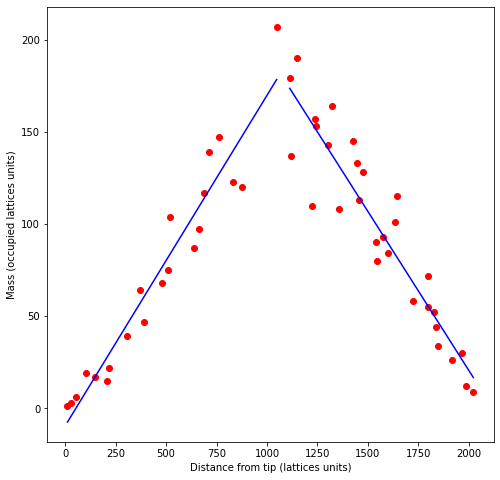

./files/particles/mode_s_ts_100_nb_10000_seed_43_.dat
length: 2201
massa: 196.000000
Area: 589.145121
Densidade 33.27


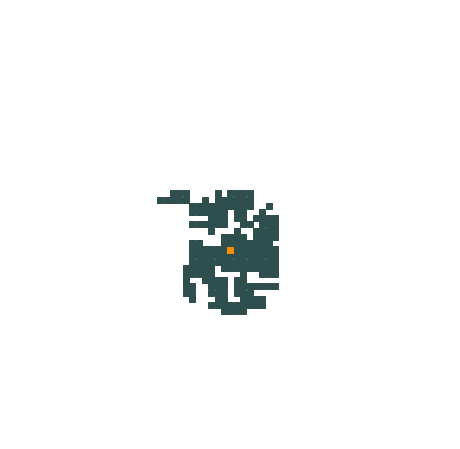

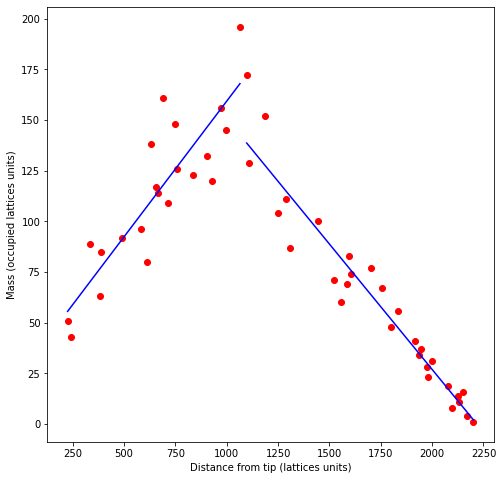

./files/particles/mode_s_ts_100_nb_10000_seed_44_.dat
length: 2229
massa: 205.000000
Area: 395.626201
Densidade 51.82


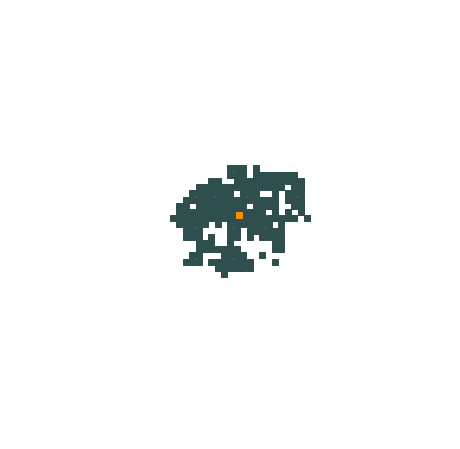

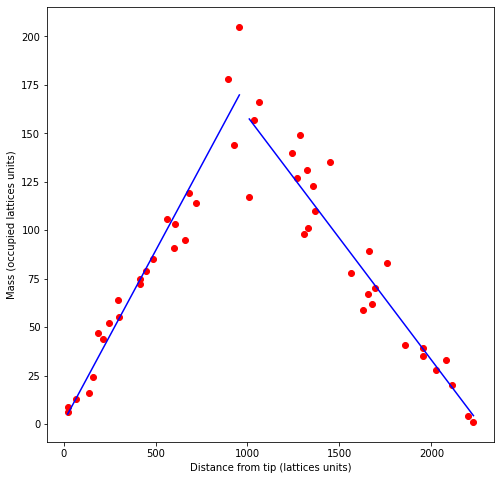

./files/particles/mode_s_ts_100_nb_10000_seed_42_.dat
length: 2189
massa: 208.000000
Area: 458.500141
Densidade 45.37


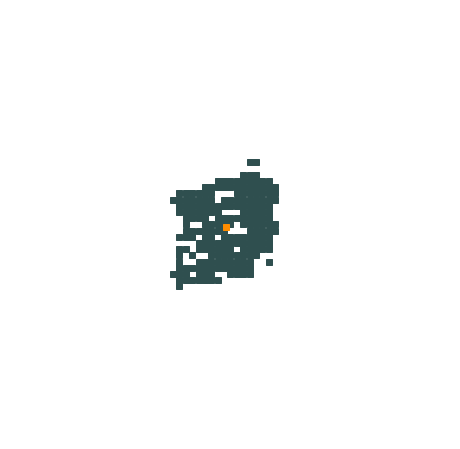

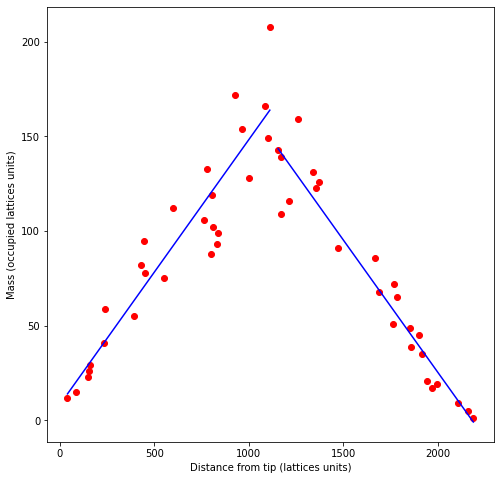

./files/particles/mode_s_ts_100_nb_10000_seed_40_.dat
length: 2285
massa: 214.000000
Area: 449.656124
Densidade 47.59


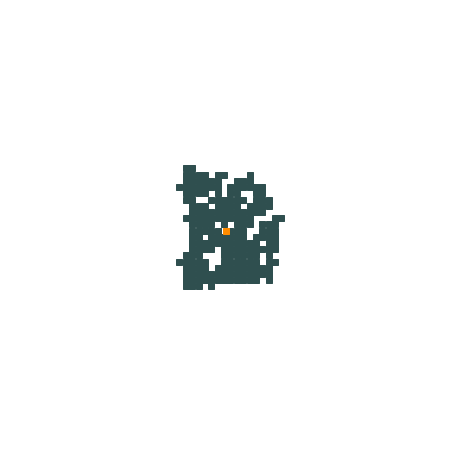

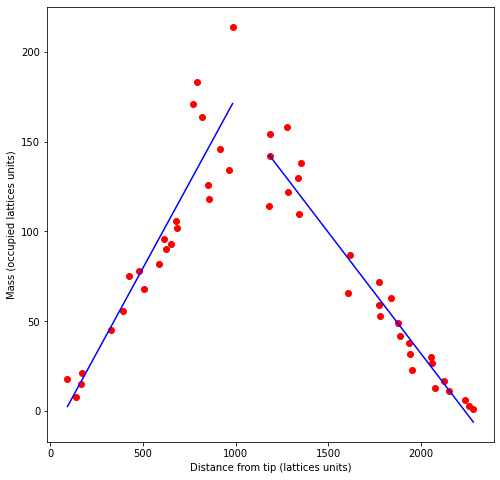

./files/particles/mode_s_ts_1000_nb_10000_seed_48_.dat
length: 2357
massa: 224.000000
Area: 421.896183
Densidade 53.09


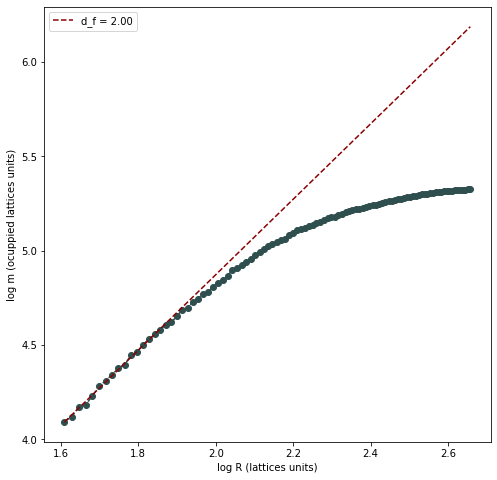

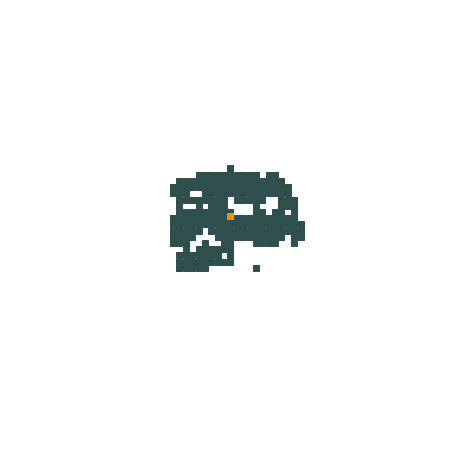

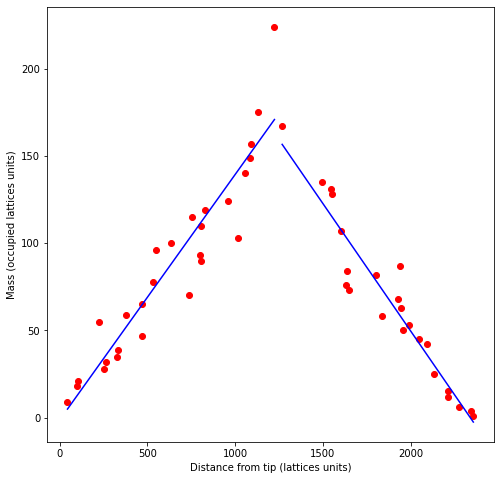

./files/particles/mode_s_ts_1000_nb_10000_seed_46_.dat
length: 2289
massa: 210.000000
Area: 398.959257
Densidade 52.64


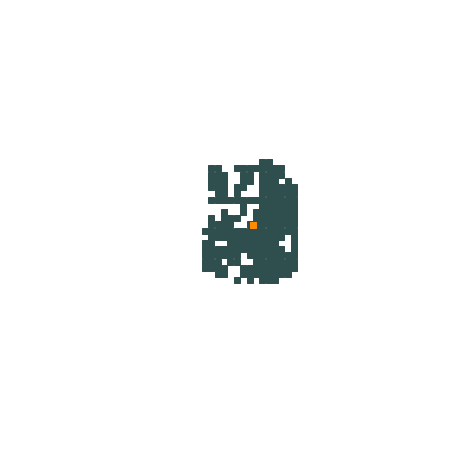

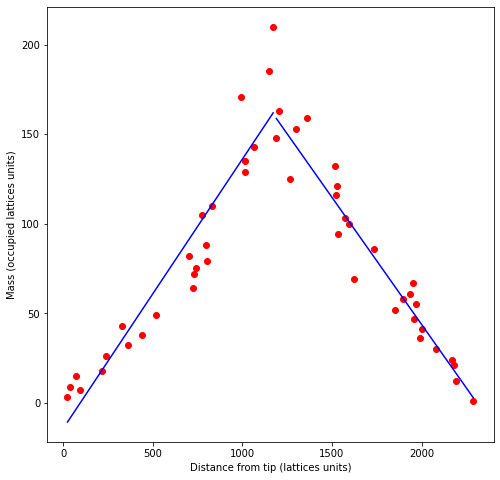

./files/particles/mode_s_ts_1000_nb_10000_seed_49_.dat
length: 2209
massa: 198.000000
Area: 381.953767
Densidade 51.84


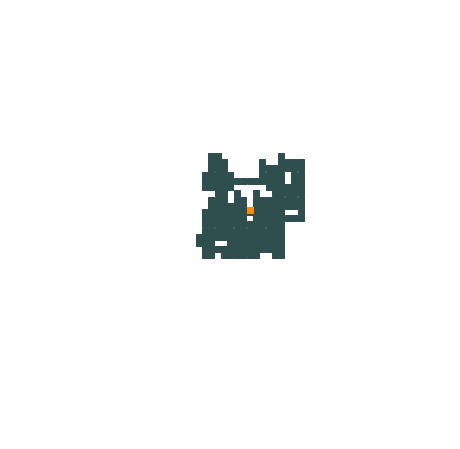

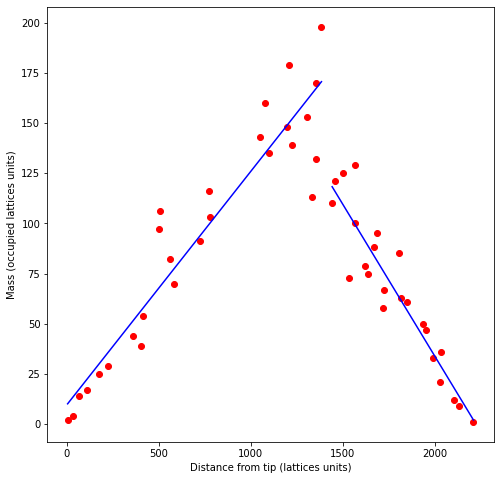

./files/particles/mode_s_ts_1000_nb_10000_seed_47_.dat
length: 2077
massa: 230.000000
Area: 388.711456
Densidade 59.17


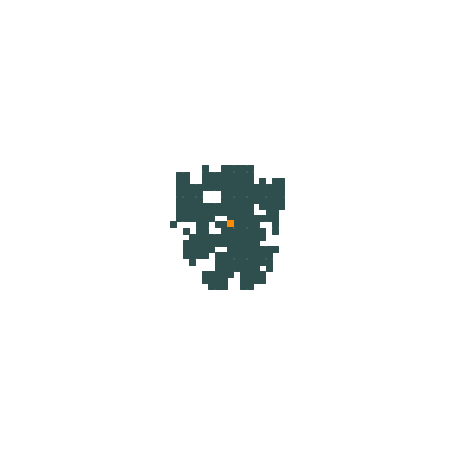

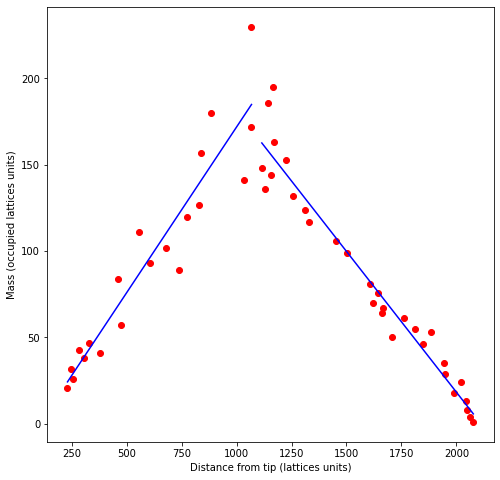

./files/particles/mode_s_ts_1000_nb_10000_seed_45_.dat
length: 2157
massa: 198.000000
Area: 297.683373
Densidade 66.51


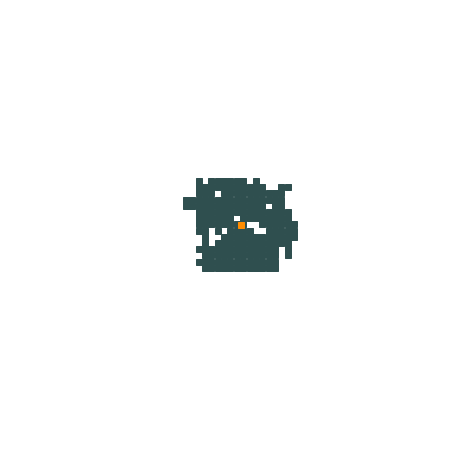

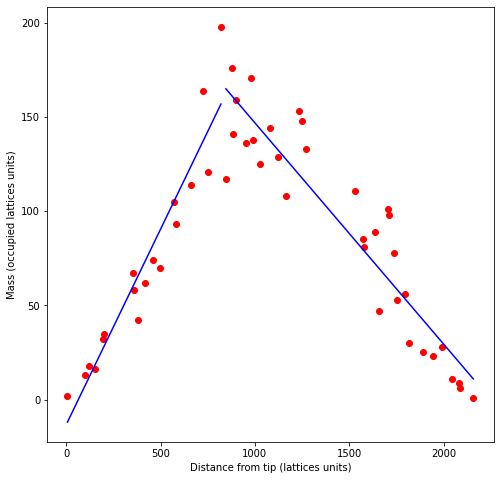

./files/particles/mode_s_ts_10000_nb_10000_seed_66_.dat
length: 2217
massa: 204.000000
Area: 299.357937
Densidade 68.15


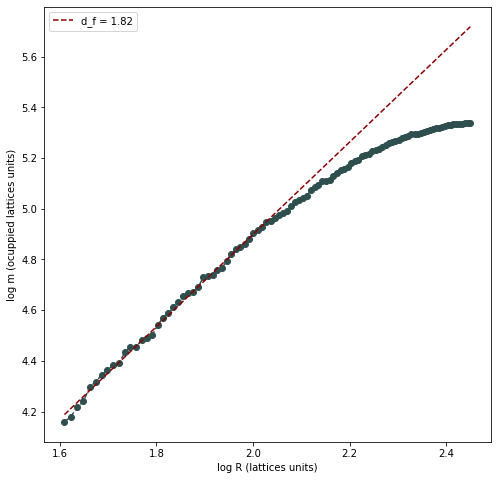

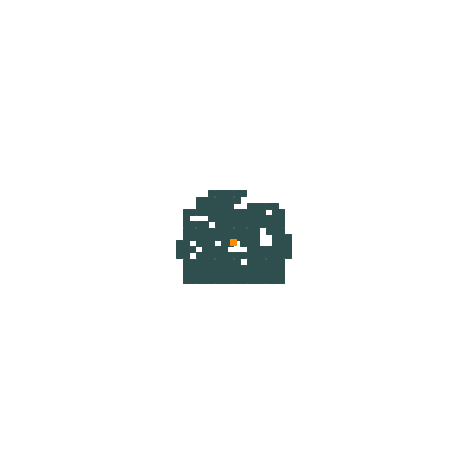

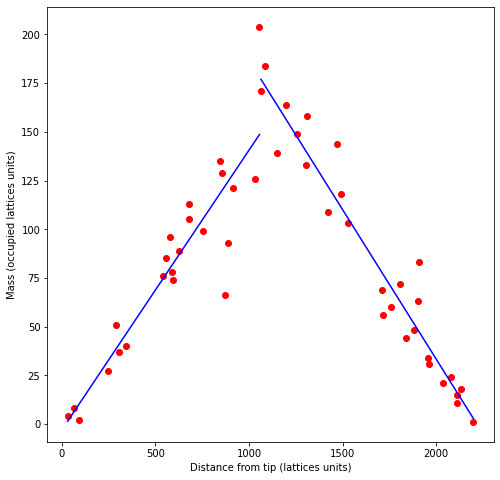

./files/particles/mode_s_ts_10000_nb_10000_seed_68_.dat
length: 2297
massa: 229.000000
Area: 438.183671
Densidade 52.26


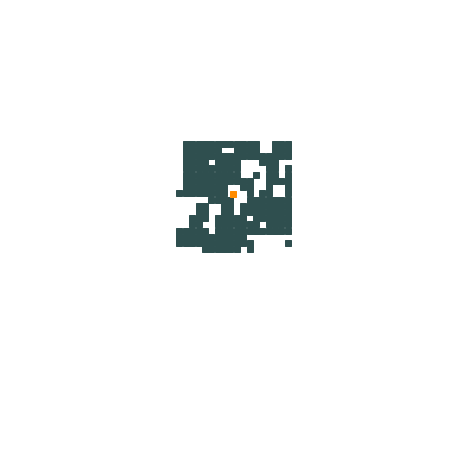

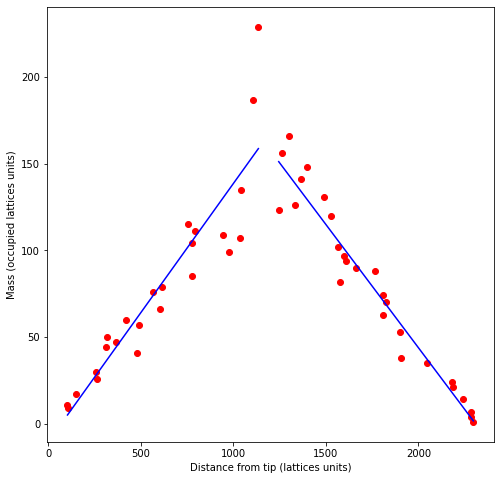

./files/particles/mode_s_ts_10000_nb_10000_seed_70_.dat
length: 2149
massa: 215.000000
Area: 335.797618
Densidade 64.03


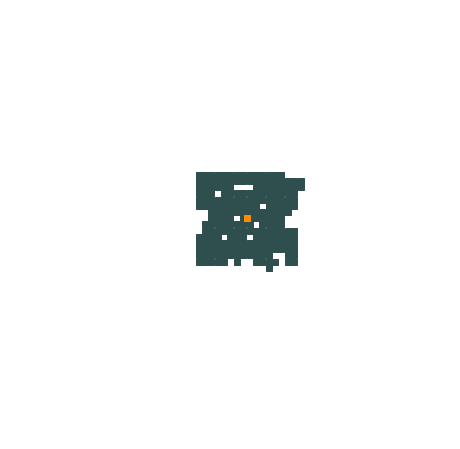

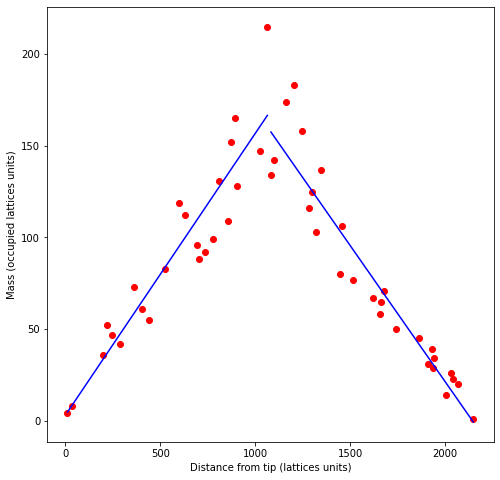

./files/particles/mode_s_ts_10000_nb_10000_seed_67_.dat
length: 2401
massa: 203.000000
Area: 306.174730
Densidade 66.30


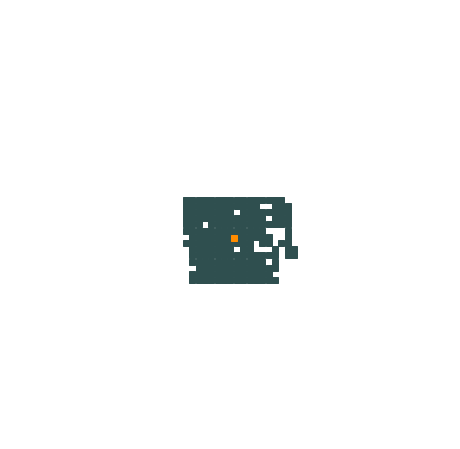

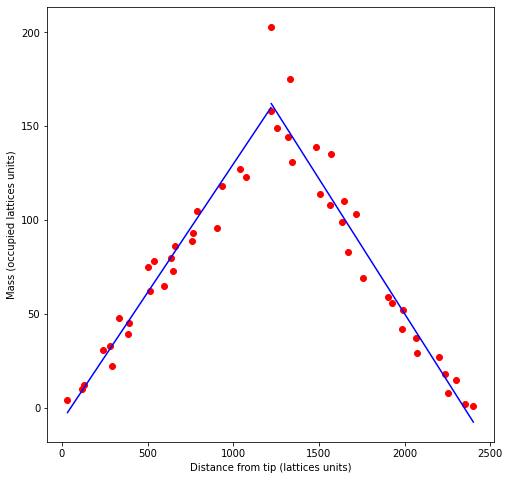

./files/particles/mode_s_ts_10000_nb_10000_seed_69_.dat
length: 2249
massa: 219.000000
Area: 399.766339
Densidade 54.78


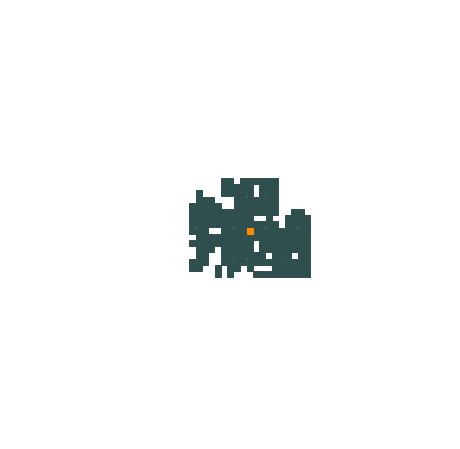

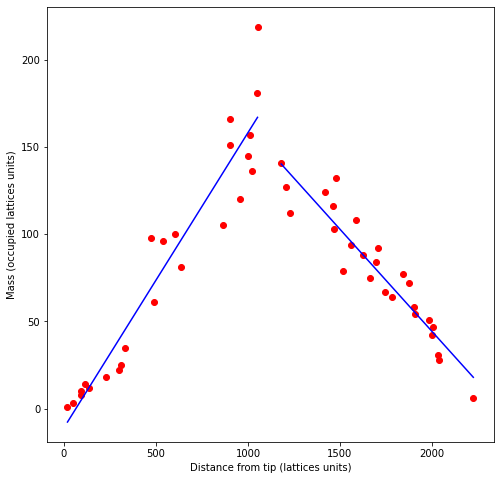

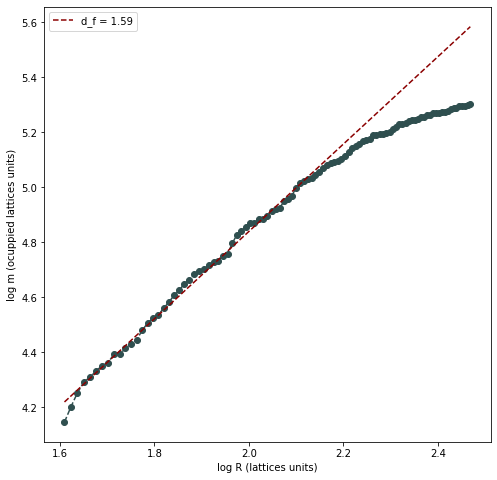

In [15]:
## CODIGO CERTO

for J in files[:]:
    
    L, R, D, F, c, num, cont, r, zs, xs = [], [], [],[], 0, 50, 0, 0, [], []

    for i in os.listdir('./files/particles'):
        i.split()
        #print(i)
        #print(J)
        if i[:-7] == J:
            arquivo_ = ('./files/particles/%s' %i)
            print(arquivo_)
            yt, yt2, counts, max, length = mass_center(arquivo_)
            x, z, xc, zc, radius, densidade = transversal_section (arquivo_, max, yt, arquivo_)
            mass_per_length(yt2,counts,max, num, arquivo_)
            
            for i in range(len(x)):
                xs.append(x[i])
            for i in range(len(z)):
                zs.append(z[i])
                
            x = np.array(xs)
            z = np.array(zs)
            if r < radius:
                r = radius
            if cont == 4:
                df = fractal(r,x,z,xc,zc,cont,arquivo_)
            else:
                cont += 1
            
            if c < 5: 
                #print("No arquivo %s" %arquivo_)
                with open('./files/data/'+J+'.txt', "a") as fid:
                    fid.write("%s\n" % arquivo_)
                    fid.write("\n")
                    fid.write("center of fibril ... %d\n" %max)
                    fid.write("Length ............. %d\n" %length)
                    fid.write("Radius ............. %d\n" %radius)
                    fid.write("Density ....... %.2f\n" %densidade)
                    #fid.write("Fractal dim ... %.2f\n" %df)

                L.append(length)
                R.append(radius)
                D.append(round(densidade, 2))
                c+= 1

            if c == 5:

                mL = sum(L)/len(L)
                mR = sum(R)/len(R)
                mD = sum(D)/len(D)

                with open('./files/data/'+J+'.txt', "a") as fid:
                    fid.write("\n")
                    fid.write("AVERAGE %s\n" % arquivo_)
                    fid.write("\n")
                    fid.write("<Length> ........ %d\n" %mL)
                    fid.write("<Radius> ........ %d\n" %mR)
                    fid.write("<Density> ....... %.2f\n" %mD)
                    fid.write("<Fractal dim> ... %.2f\n" %df)
                    fid.write("\n")

                c = 0

In [5]:
L, R, D, F, c, num, cont, r, zs, xs = [], [], [],[], 0, 50, 0, 0, [], []
#J = files[4]
j = 'dla_mode_n_ts_10000_nb_10000_seed_62_teste.dat'
for i in os.listdir('./files/'):
        #i.split()
        #print(i[3:-7])
        if i == j:
            print(i)
            extend_fibers(i)

J = 'mode_n_ts_10000_nb_10000_seed_62_teste.dat'
for i in os.listdir('./files/particles'):
    print(i)
    #i.split()
    #print(i)
    #print(J)
    if i == J:
        arquivo_ = ('./files/particles/%s' %i)
        print(arquivo_)
        yt, yt2, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius, densidade = transversal_section (arquivo_, max, yt, arquivo_)
        mass_per_length(yt2,counts,max, num, arquivo_)
        
        for i in range(len(x)):
            xs.append(x[i])
        for i in range(len(z)):
            zs.append(z[i])
            
        x = np.array(xs)
        z = np.array(zs)
        if r < radius:
            r = radius
        if cont == 4:
            df = fractal(r,x,z,xc,zc,cont,arquivo_)
        else:
            cont += 1
        
        if c < 5: 
            #print("No arquivo %s" %arquivo_)
            with open('./files/data/'+J+'.txt', "w") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                #fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)

            with open('./files/data/'+J+'.txt', "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %df)
                fid.write("\n")

            c = 0

mode_s_ts_1000_nb_10000_seed_48_.dat
mode_n_ts_100_nb_10000_seed_22_.dat
mode_n_ts_1_nb_10000_seed_14_.dat
mode_n_ts_1_nb_10000_seed_11_.dat
mode_n_ts_1000_nb_10000_seed_27_.dat
mode_s_ts_1_nb_10000_seed_32_.dat
mode_n_ts_100_nb_10000_seed_24_.dat
mode_n_ts_1_nb_10000_seed_10_.dat
mode_n_ts_10_nb_10000_seed_19_.dat
mode_n_ts_10_nb_10000_seed_17_.dat
mode_s_ts_10000_nb_10000_seed_66_.dat
mode_n_ts_100_nb_10000_seed_21_.dat
mode_s_ts_10000_nb_10000_seed_68_.dat
mode_n_ts_10000_nb_10000_seed_53_.dat
mode_s_ts_100_nb_10000_seed_41_.dat
mode_n_ts_1000_nb_10000_seed_25_.dat
mode_s_ts_10000_nb_10000_seed_70_.dat
mode_s_ts_10_nb_10000_seed_38_.dat
mode_s_ts_1000_nb_10000_seed_46_.dat
mode_n_ts_10000_nb_10000_seed_56_.dat
mode_n_ts_10000_nb_10000_seed_52_.dat
mode_s_ts_100_nb_10000_seed_43_.dat
mode_n_ts_1000_nb_10000_seed_26_.dat
mode_n_ts_10_nb_10000_seed_16_.dat
mode_s_ts_10_nb_10000_seed_37_.dat
mode_s_ts_1_nb_10000_seed_34_.dat
mode_s_ts_1_nb_10000_seed_33_.dat
mode_s_ts_1000_nb_10000_seed

In [ ]:
arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(1,j))
print(arquivo_)
yt, counts, max, length = mass_center(arquivo_)
#print(max[0])

x, z, xc, zc, radius = transversal_section (arquivo_, max)

In [28]:
num = 500
c = 0
L, R , D, F, I = [], [], [], [], 1
J = files[4]
print()
for i in range(0,4):
    for j in range(0,5):

        arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(I,j))
        yt, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius = transversal_section (arquivo_, max)
        df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
        mass_per_length(yt,counts,max, num)
    
        if c < 5: 
            print("No arquivo %s" %arquivo_)
            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            F.append(round(df, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)
            mF = sum(F)/len(F)

            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %mF)
                fid.write("\n")

            c = 0

    I = I *10


FileNotFoundError: [Errno 2] No such file or directory: './files/particles/n_mode_1_0.dat'

Para 1 arquivo


In [62]:

def extend_fibers(fname):    
    print('extending ', fname)
    #fout = fname.replace('dla_','')
    fout = fname.replace('/n','/particles')
    with open (fout, "w") as fid:
        with open(fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

wdir = './files/particles'

#for fname in os.listdir(wdir):
fname = './files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat'
extend_fibers(fname)

extending  ./files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat


4
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entr

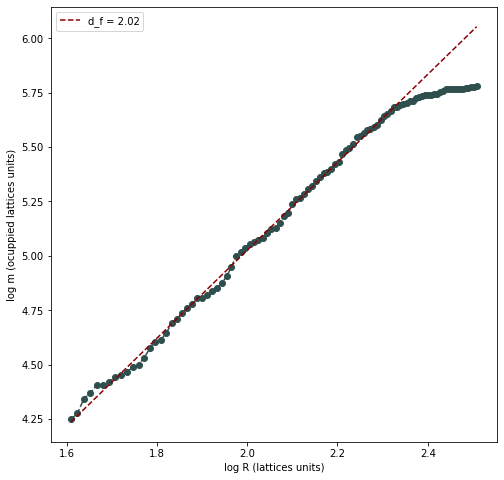

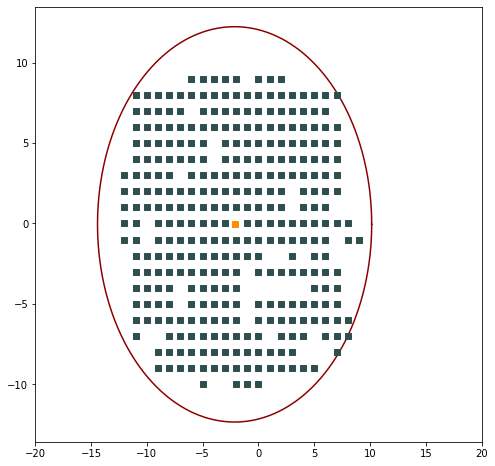

In [85]:
arquivo_ = ('./files/particles/dla_mode_n_ts_1000_nb_10000_seed_90_.dat')
yt, counts, max, length = mass_center(arquivo_)
print(max)
x, z, xc, zc, radius = transversal_section (arquivo_, max, yt)
df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
#mass_per_length(yt,counts,max, num)

In [53]:
##Compare two files


import filecmp
  
f1 = "./files/dla_mode_n_ts_10000_nb_10000_seed_53_teste.dat"
f2 = "./files/dla_mode_n_ts_10000_nb_10000_seed_53_.dat"

result = filecmp.cmp(f1, f2, shallow = True)
print(result)

True
